In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
%matplotlib inline

In [3]:
iris = sns.load_dataset('iris')

In [4]:
iris.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


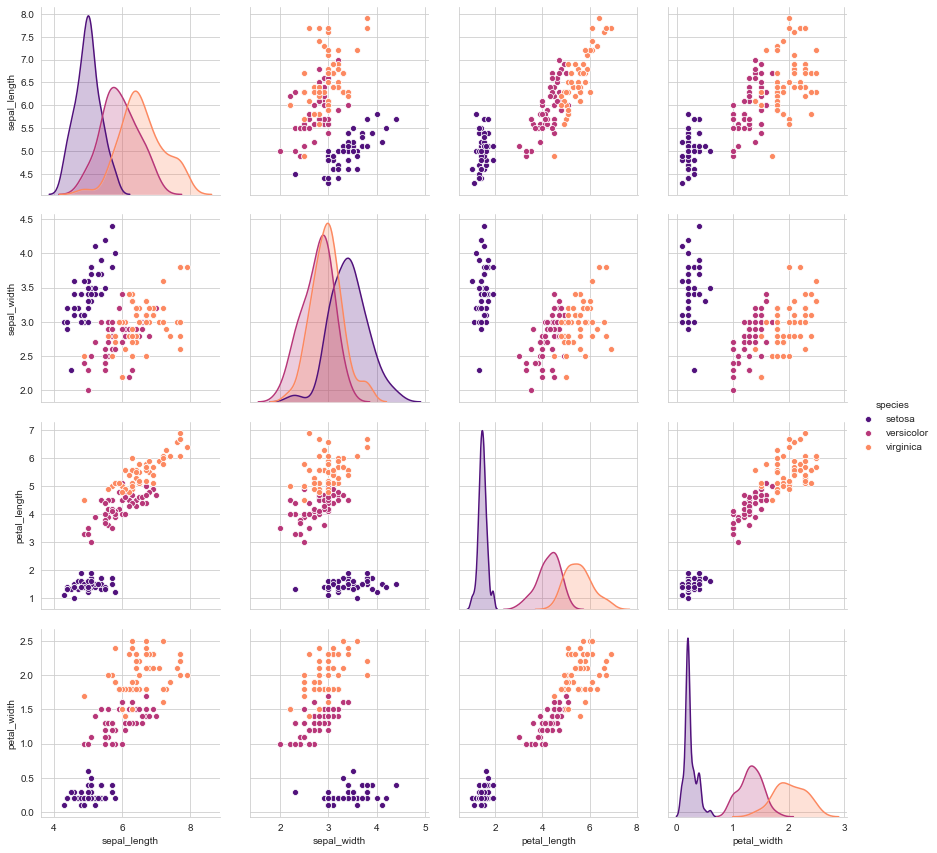

In [11]:
sns.set_style('whitegrid')
sns.pairplot(data=iris,hue='species',palette='magma',height=3,diag_kind='auto')

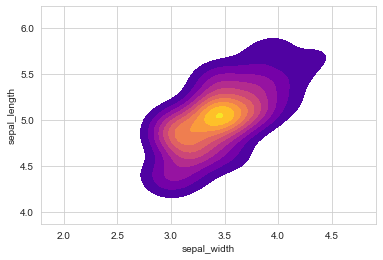

In [38]:
sns.kdeplot(data2=iris[iris['species']=='setosa']['sepal_length'],data=iris[iris['species']=='setosa']['sepal_width'],
            cmap='plasma',shade=True,shade_lowest=False)

In [18]:
X = iris.drop('species',axis=1)
y = iris['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
sv = SVC()

In [23]:
sv.fit(X_train,y_train)

C:\Users\Upasana\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [24]:
pred = sv.predict(X_test)

In [26]:
print(confusion_matrix(y_test,pred))
print('\n',classification_report(y_test,pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



In [27]:
param_grid = {'C':[0.01,0.1,1,10,100,1000],
             'gamma':[10,1,0.5,0.1,0.05,0.01,0.001,0.0001]}

In [41]:
grcv = GridSearchCV(SVC(),param_grid,cv=5,verbose=2)

In [42]:
grcv.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=10 ................................................
[CV] ................................. C=0.01, gamma=10, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] .................................. C=0.01, gamma=1, total=   0.0s
[CV] C=0.01, gamma=1 .................................................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................... C=0.01, gamma=0.01, total=   0.0s
[CV] C=0.01, gamma=0.01 ..............................................
[CV] ............................... C=0.01, gamma=0.01, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.001 .............................................
[CV] .............................. C=0.01, gamma=0.001, total=   0.0s
[CV] C=0.01, gamma=0.0001 ............................................
[CV] .

[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.05 .................................................
[CV] .................................. C=1, gamma=0.05, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C=1, gamma=0.01 .................................................
[CV] .................................. C=1, gamma=0.01, total=   0.0s
[CV] C

[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=1 ..................................................
[CV] ................................... C=100, gamma=1, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] ................................. C=100, gamma=0.5, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] ................................. C=100, gamma=0.5, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] ................................. C=100, gamma=0.5, total=   0.0s
[CV] C=100, gamma=0.5 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': [10, 1, 0.5, 0.1, 0.05, 0.01, 0.001, 0.0001]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=2)

In [43]:
grcv.best_params_

{'C': 100, 'gamma': 0.01}

In [44]:
pred = grcv.predict(X_test)

In [45]:
print(confusion_matrix(y_test,pred))
print('\n',classification_report(y_test,pred))

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]

               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50

